In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df.head()

,UDI,Product ID,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,0,0,0,0,0,0
1,2,L47181,0,0,0,0,0,0
2,3,L47182,0,0,0,0,0,0
3,4,L47183,0,0,0,0,0,0
4,5,L47184,0,0,0,0,0,0


In [14]:
X = df.iloc[:,4:8]
y = df['Machine failure']

In [50]:
X

,HDF,PWF,OSF,RNF
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
9995,0,0,0,0
9996,0,0,0,0
9997,0,0,0,0
9998,0,0,0,0


###Samples


In [15]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [16]:
samples

[(      HDF  PWF  OSF  RNF
  7681    0    0    0    0
  9031    0    0    0    0
  3691    0    0    0    0
  202     0    0    0    0
  5625    0    0    0    0
  ...   ...  ...  ...  ...
  9225    0    0    0    0
  4859    0    0    0    0
  3264    0    0    0    0
  9845    0    0    0    0
  2732    0    0    0    0
  
  [7000 rows x 4 columns],
        HDF  PWF  OSF  RNF
  9394    0    0    0    0
  898     0    0    0    0
  2398    0    0    0    0
  5906    0    0    0    0
  2343    0    0    0    0
  ...   ...  ...  ...  ...
  4004    0    0    0    0
  7375    0    0    0    0
  9307    0    0    0    0
  8394    0    0    0    0
  5233    0    0    0    0
  
  [3000 rows x 4 columns],
  7681    0
  9031    0
  3691    0
  202     0
  5625    0
         ..
  9225    0
  4859    0
  3264    0
  9845    0
  2732    0
  Name: Machine failure, Length: 7000, dtype: int64,
  9394    0
  898     0
  2398    0
  5906    0
  2343    0
         ..
  4004    0
  7375    0
  9307    0

###Fitness Function

In [33]:
kernals = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [39]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [40]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  9.13 Best Epsilon =  0.84
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  4.08 Best Epsilon =  5.44
Best Accuracy =  1.0 Best Kernel =  linear Best Nu =  9.8 Best Epsilon =  5.82
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  9.16 Best Epsilon =  3.61
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  2.85 Best Epsilon =  0.34
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  4.49 Best Epsilon =  5.82
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  3.27 Best Epsilon =  9.99
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  0.45 Best Epsilon =  9.45
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  6.39 Best Epsilon =  6.81
Best Accuracy =  0.99 Best Kernel =  sigmoid Best Nu =  5.05 Best Epsilon =  7.31


###Result Table

In [41]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,sigmoid,9.13,0.84
1,2,1.00,linear,4.08,5.44
2,3,1.00,linear,9.80,5.82
3,4,0.99,sigmoid,9.16,3.61
4,5,0.99,sigmoid,2.85,0.34
5,6,0.99,sigmoid,4.49,5.82
6,7,0.99,sigmoid,3.27,9.99
7,8,0.99,sigmoid,0.45,9.45
8,9,0.99,sigmoid,6.39,6.81
9,10,0.99,sigmoid,5.05,7.31


###Convergence Graph

In [42]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [46]:
from sklearn.svm import SVC

In [43]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [44]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

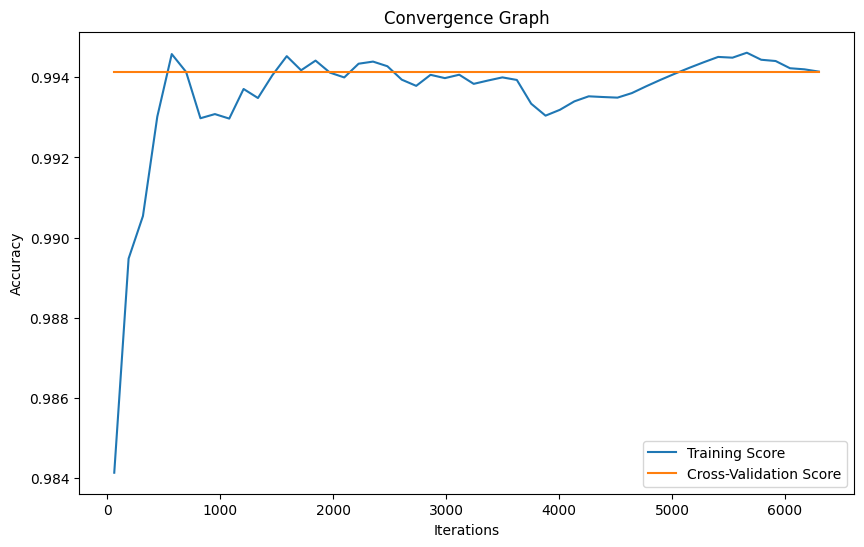

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()